# Airline Operations & Revenue Analysis 



### Business Problem

### Import Libraries 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization settings
sns.set(style="whitegrid")


### Connect to the Database

In [2]:
# connect database
conn = sqlite3.connect(r"C:\Users\Piyush\OneDrive\Desktop\All\Portfolio Projects\Airline Case study\travel.sqlite")
cursor = conn.cursor()

print("Database connected successfully!")


Database connected successfully!


In [3]:
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""

tables = pd.read_sql_query(query, conn)
tables


,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


### Inspect Each Table Structure

In [4]:
for table in tables['name']:
    print(f"\nSchema for {table}")
    display(pd.read_sql_query(f"PRAGMA table_info({table});", conn))



Schema for aircrafts_data


,cid,name,type,notnull,dflt_value,pk
0,0,aircraft_code,character(3),1,None,0
1,1,model,jsonb,1,None,0
2,2,range,INTEGER,1,None,0



Schema for airports_data


,cid,name,type,notnull,dflt_value,pk
0,0,airport_code,character(3),1,None,0
1,1,airport_name,jsonb,1,None,0
2,2,city,jsonb,1,None,0
3,3,coordinates,point,1,None,0
4,4,timezone,TEXT,1,None,0



Schema for boarding_passes


,cid,name,type,notnull,dflt_value,pk
0,0,ticket_no,character(13),1,None,0
1,1,flight_id,INTEGER,1,None,0
2,2,boarding_no,INTEGER,1,None,0
3,3,seat_no,character varying(4),1,None,0



Schema for bookings


,cid,name,type,notnull,dflt_value,pk
0,0,book_ref,character(6),1,None,0
1,1,book_date,timestamp with time zone,1,None,0
2,2,total_amount,"numeric(10,2)",1,None,0



Schema for flights


,cid,name,type,notnull,dflt_value,pk
0,0,flight_id,INTEGER,1,None,0
1,1,flight_no,character(6),1,None,0
2,2,scheduled_departure,timestamp with time zone,1,None,0
3,3,scheduled_arrival,timestamp with time zone,1,None,0
4,4,departure_airport,character(3),1,None,0
5,5,arrival_airport,character(3),1,None,0
6,6,status,character varying(20),1,None,0
7,7,aircraft_code,character(3),1,None,0
8,8,actual_departure,timestamp with time zone,0,None,0
9,9,actual_arrival,timestamp with time zone,0,None,0



Schema for seats


,cid,name,type,notnull,dflt_value,pk
0,0,aircraft_code,character(3),1,None,0
1,1,seat_no,character varying(4),1,None,0
2,2,fare_conditions,character varying(10),1,None,0



Schema for ticket_flights


,cid,name,type,notnull,dflt_value,pk
0,0,ticket_no,character(13),1,None,0
1,1,flight_id,INTEGER,1,None,0
2,2,fare_conditions,character varying(10),1,None,0
3,3,amount,"numeric(10,2)",1,None,0



Schema for tickets


,cid,name,type,notnull,dflt_value,pk
0,0,ticket_no,character(13),1,None,0
1,1,book_ref,character(6),1,None,0
2,2,passenger_id,character varying(20),1,None,0


In [5]:
flights = pd.read_sql_query("SELECT * FROM flights", conn)
tickets = pd.read_sql_query("SELECT * FROM tickets", conn)
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights", conn)
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", conn)
aircrafts = pd.read_sql_query("SELECT * FROM aircrafts_data", conn)
airports = pd.read_sql_query("SELECT * FROM airports_data", conn)
seats = pd.read_sql_query("SELECT * FROM seats", conn)
bookings = pd.read_sql_query("SELECT * FROM bookings", conn)


### Basic Data Understanding

In [6]:
flights.head()


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [7]:
flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     33121 non-null  object
 9   actual_arrival       33121 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


In [8]:
flights.describe(include="all")


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
count,33121.000000,33121,33121,33121,33121,33121,33121,33121,33121,33121
unique,NaN,710,10365,9648,104,104,6,8,12108,11851
top,NaN,PG0134,2017-09-12 11:25:00+03,2017-09-10 14:55:00+03,DME,DME,Arrived,CN1,\N,\N
freq,NaN,61,11,13,3217,3217,16707,9273,16348,16406
mean,16561.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9561.353469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8281.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16561.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,24841.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [10]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366733 entries, 0 to 366732
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_no     366733 non-null  object
 1   book_ref      366733 non-null  object
 2   passenger_id  366733 non-null  object
dtypes: object(3)
memory usage: 8.4+ MB


In [11]:
tickets.describe(include = "all")

,ticket_no,book_ref,passenger_id
count,366733,366733,366733
unique,366733,262788,366733
top,0005432000987,6252BD,8149 604011
freq,1,5,1


In [12]:
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [13]:
ticket_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045726 entries, 0 to 1045725
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ticket_no        1045726 non-null  object
 1   flight_id        1045726 non-null  int64 
 2   fare_conditions  1045726 non-null  object
 3   amount           1045726 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 31.9+ MB


In [14]:
ticket_flights.describe(include="all")

,ticket_no,flight_id,fare_conditions,amount
count,1045726,1.045726e+06,1045726,1.045726e+06
unique,366733,NaN,3,NaN
top,0005435127298,NaN,Economy,NaN
freq,6,NaN,920793,NaN
mean,NaN,1.411006e+04,NaN,1.985891e+04
std,NaN,9.732944e+03,NaN,2.261239e+04
min,NaN,1.000000e+00,NaN,3.000000e+03
25%,NaN,5.501000e+03,NaN,7.200000e+03
50%,NaN,1.192600e+04,NaN,1.340000e+04
75%,NaN,2.303900e+04,NaN,2.310000e+04


In [15]:
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [16]:
boarding_passes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579686 entries, 0 to 579685
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ticket_no    579686 non-null  object
 1   flight_id    579686 non-null  int64 
 2   boarding_no  579686 non-null  int64 
 3   seat_no      579686 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.7+ MB


In [17]:
boarding_passes.describe(include="all")

,ticket_no,flight_id,boarding_no,seat_no
count,579686,579686.000000,579686.000000,579686
unique,238834,NaN,NaN,461
top,0005435787333,NaN,NaN,1A
freq,6,NaN,NaN,5951
mean,NaN,13720.816521,54.971529,NaN
std,NaN,9713.921174,58.819012,NaN
min,NaN,1.000000,1.000000,NaN
25%,NaN,5351.000000,15.000000,NaN
50%,NaN,11217.000000,36.000000,NaN
75%,NaN,22481.000000,72.000000,NaN


In [18]:
aircrafts.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [19]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


In [20]:
aircrafts.describe(include="all")

,aircraft_code,model,range
count,9,9,9.000000
unique,9,9,NaN
top,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",NaN
freq,1,1,NaN
mean,NaN,NaN,5344.444444
std,NaN,NaN,3013.764718
min,NaN,NaN,1200.000000
25%,NaN,NaN,3000.000000
50%,NaN,NaN,5600.000000
75%,NaN,NaN,6700.000000


In [21]:
airports.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [22]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airport_code  104 non-null    object
 1   airport_name  104 non-null    object
 2   city          104 non-null    object
 3   coordinates   104 non-null    object
 4   timezone      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [23]:
airports.describe(include="all")

,airport_code,airport_name,city,coordinates,timezone
count,104,104,104,104,104
unique,104,104,101,104,17
top,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}","(129.77099609375,62.0932998657226562)",Europe/Moscow
freq,1,1,3,1,44


In [24]:
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [25]:
seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aircraft_code    1339 non-null   object
 1   seat_no          1339 non-null   object
 2   fare_conditions  1339 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [26]:
seats.describe(include="all")

,aircraft_code,seat_no,fare_conditions
count,1339,1339,1339
unique,9,461,3
top,773,2A,Economy
freq,402,9,1139


In [27]:
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [28]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262788 entries, 0 to 262787
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_ref      262788 non-null  object
 1   book_date     262788 non-null  object
 2   total_amount  262788 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


In [29]:
bookings.describe(include="all")

,book_ref,book_date,total_amount
count,262788,262788,2.627880e+05
unique,262788,68631,NaN
top,00000F,2017-07-11 04:18:00+03,NaN
freq,1,15,NaN
mean,NaN,NaN,7.902561e+04
std,NaN,NaN,7.762192e+04
min,NaN,NaN,3.400000e+03
25%,NaN,NaN,2.900000e+04
50%,NaN,NaN,5.590000e+04
75%,NaN,NaN,9.920000e+04


### Analysis

In [32]:
date_cols = [
    'scheduled_departure',
    'actual_departure',
    'scheduled_arrival',
    'actual_arrival'
]

for col in date_cols:
    flights[col] = pd.to_datetime(flights[col], errors='coerce')


C:\Users\Piyush\AppData\Local\Temp\ipykernel_5292\555455490.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights[col] = pd.to_datetime(flights[col], errors='coerce')
C:\Users\Piyush\AppData\Local\Temp\ipykernel_5292\555455490.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights[col] = pd.to_datetime(flights[col], errors='coerce')


In [33]:
flights = flights.dropna(subset=['scheduled_departure', 'actual_departure'])


### Calculate Flight Delay

In [35]:
flights['departure_delay'] = (
    flights['actual_departure'] - flights['scheduled_departure']
).dt.total_seconds() / 60

flights['arrival_delay'] = (
    flights['actual_arrival'] - flights['scheduled_arrival']
).dt.total_seconds() / 60


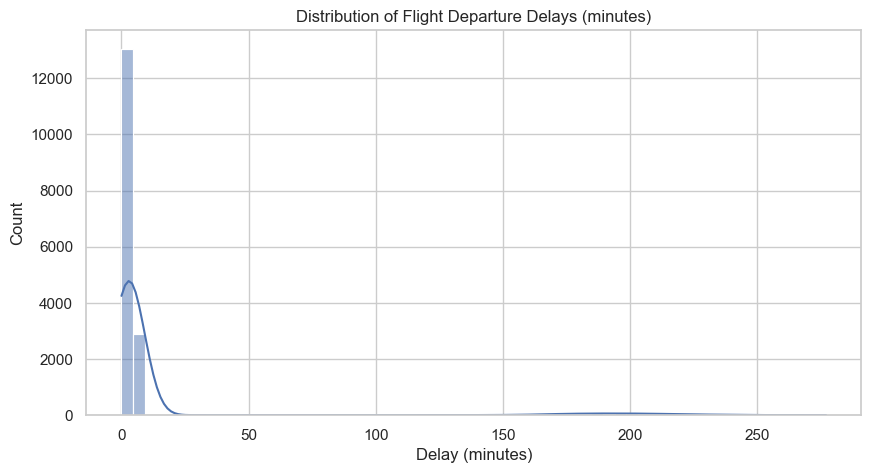

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(flights['departure_delay'].dropna(), bins=60, kde=True)
plt.title("Distribution of Flight Departure Delays (minutes)")
plt.xlabel("Delay (minutes)")
plt.show()


### Average Delay per Airport

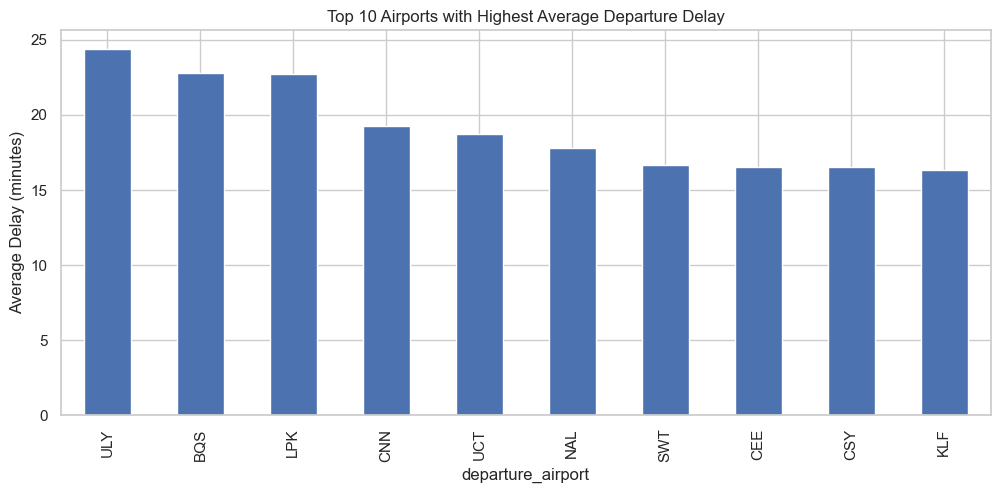

In [37]:
airport_delay = flights.groupby('departure_airport')['departure_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
airport_delay.plot(kind='bar')
plt.title("Top 10 Airports with Highest Average Departure Delay")
plt.ylabel("Average Delay (minutes)")
plt.show()


### Passenger No-Show Analysis

### How many passengers book tickets but never board the flight?

In [42]:
# total passengers who purchased tickets
booked = pd.read_sql_query("""

SELECT 
    flight_id,
    COUNT(ticket_no) AS booked_passengers
FROM ticket_flights
GROUP BY flight_id;

""", conn)


In [43]:
# passengers who actually boarded aircraft
boarded = pd.read_sql_query("""

SELECT 
    flight_id,
    COUNT(ticket_no) AS boarded_passengers
FROM boarding_passes
GROUP BY flight_id;

""", conn)



In [44]:
no_show_df = booked.merge(boarded, on='flight_id', how='left')
no_show_df['boarded_passengers'] = no_show_df['boarded_passengers'].fillna(0)


In [45]:
no_show_df['no_show_passengers'] = (
    no_show_df['booked_passengers'] - no_show_df['boarded_passengers']
)

no_show_df['no_show_rate'] = (
    no_show_df['no_show_passengers'] / no_show_df['booked_passengers']
) * 100

no_show_df.head()


,flight_id,booked_passengers,boarded_passengers,no_show_passengers,no_show_rate
0,1,79,79.0,0.0,0.0
1,2,101,101.0,0.0,0.0
2,3,97,97.0,0.0,0.0
3,5,93,0.0,93.0,100.0
4,6,101,0.0,101.0,100.0


In [46]:
total_booked = no_show_df['booked_passengers'].sum()
total_boarded = no_show_df['boarded_passengers'].sum()

no_show = total_booked - total_boarded
no_show_rate = (no_show / total_booked) * 100

print("Total Booked Seats:", total_booked)
print("Total Boarded Passengers:", total_boarded)
print("Total No Shows:", no_show)
print("No Show Rate:", round(no_show_rate,2), "%")


Total Booked Seats: 1045726
Total Boarded Passengers: 579686.0
Total No Shows: 466040.0
No Show Rate: 44.57 %


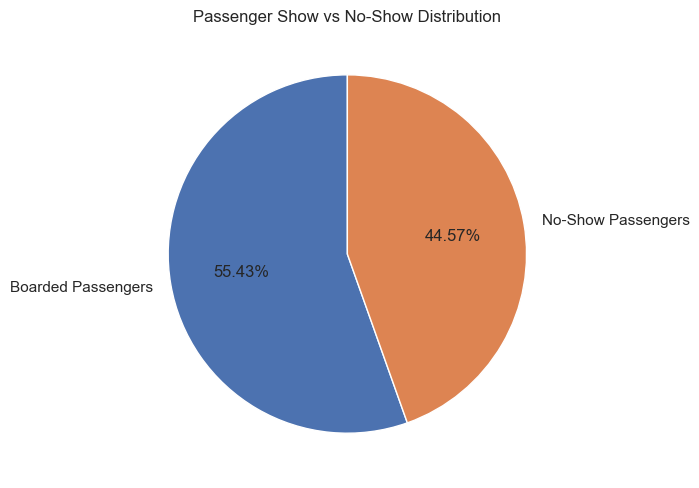

In [47]:
labels = ['Boarded Passengers', 'No-Show Passengers']
values = [total_boarded, no_show]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Passenger Show vs No-Show Distribution")
plt.tight_layout()
plt.show()


### Revenue Lost Due to No-Show

In [48]:
lost_revenue_df = pd.read_sql_query("""

SELECT 
    SUM(tf.amount) AS lost_revenue
FROM ticket_flights tf
LEFT JOIN boarding_passes bp
    ON tf.ticket_no = bp.ticket_no
    AND tf.flight_id = bp.flight_id
WHERE bp.ticket_no IS NULL;

""", conn)

lost_revenue_df


,lost_revenue
0,9231571200


In [50]:
lost_revenue = lost_revenue_df['lost_revenue'][0]
print("Estimated Revenue Lost due to No-Shows:", round(lost_revenue,2))


Estimated Revenue Lost due to No-Shows: 9231571200


In [51]:
total_revenue_df = pd.read_sql_query("""
SELECT SUM(amount) AS total_revenue
FROM ticket_flights;
""", conn)

total_revenue = total_revenue_df['total_revenue'][0]
print("Total Revenue:", round(total_revenue,2))


Total Revenue: 20766980900


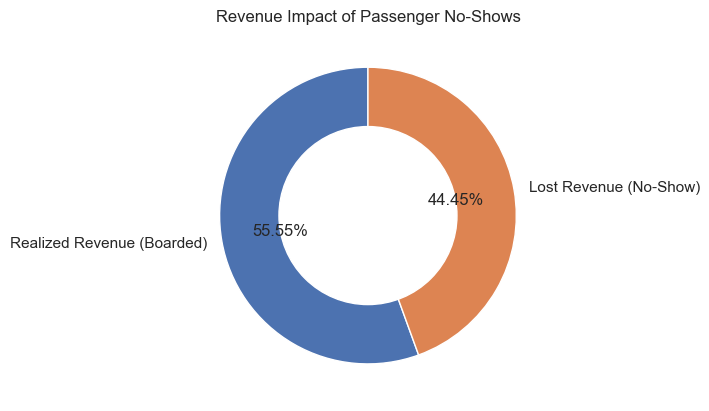

In [52]:
labels = ['Realized Revenue (Boarded)', 'Lost Revenue (No-Show)']
values = [total_revenue - lost_revenue, lost_revenue]

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Revenue Impact of Passenger No-Shows")
plt.tight_layout()
plt.show()


### Aircraft Seat Capacity

In [53]:
seat_capacity = pd.read_sql_query("""

SELECT 
    aircraft_code,
    COUNT(seat_no) AS total_seats
FROM seats
GROUP BY aircraft_code;

""", conn)

seat_capacity


,aircraft_code,total_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


### Passengers Boarded Per Flight

In [54]:
passengers_per_flight = pd.read_sql_query("""

SELECT 
    flight_id,
    COUNT(ticket_no) AS boarded_passengers
FROM boarding_passes
GROUP BY flight_id;

""", conn)

passengers_per_flight.head()


,flight_id,boarded_passengers
0,1,79
1,2,101
2,3,97
3,17,101
4,18,96


### Merge With Flights & Aircraft

In [55]:
# merge flights with passenger count
flight_load = flights.merge(passengers_per_flight, on='flight_id', how='left')

# merge with aircraft capacity
flight_load = flight_load.merge(seat_capacity, on='aircraft_code', how='left')

flight_load.head()


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,departure_delay,arrival_delay,boarded_passengers,total_seats
0,1,PG0405,2017-07-16 09:35:00+03:00,2017-07-16 10:30:00+03:00,DME,LED,Arrived,321,2017-07-16 09:44:00+03:00,2017-07-16 10:39:00+03:00,9.0,9.0,79.0,170
1,2,PG0404,2017-08-05 19:05:00+03:00,2017-08-05 20:00:00+03:00,DME,LED,Arrived,321,2017-08-05 19:06:00+03:00,2017-08-05 20:01:00+03:00,1.0,1.0,101.0,170
2,3,PG0405,2017-08-05 09:35:00+03:00,2017-08-05 10:30:00+03:00,DME,LED,Arrived,321,2017-08-05 09:39:00+03:00,2017-08-05 10:34:00+03:00,4.0,4.0,97.0,170
3,14,PG0402,2017-08-06 12:25:00+03:00,2017-08-06 13:20:00+03:00,DME,LED,Arrived,321,2017-08-06 12:28:00+03:00,2017-08-06 13:23:00+03:00,3.0,3.0,NaN,170
4,15,PG0402,2017-07-28 12:25:00+03:00,2017-07-28 13:20:00+03:00,DME,LED,Arrived,321,2017-07-28 12:31:00+03:00,2017-07-28 13:26:00+03:00,6.0,6.0,NaN,170


### Calculate Load Factor 

In [56]:
flight_load['boarded_passengers'] = flight_load['boarded_passengers'].fillna(0)

flight_load['load_factor'] = (
    flight_load['boarded_passengers'] / flight_load['total_seats']
) * 100

flight_load[['flight_id','aircraft_code','boarded_passengers','total_seats','load_factor']].head()


,flight_id,aircraft_code,boarded_passengers,total_seats,load_factor
0,1,321,79.0,170,46.470588
1,2,321,101.0,170,59.411765
2,3,321,97.0,170,57.058824
3,14,321,0.0,170,0.000000
4,15,321,0.0,170,0.000000


### Load Factor Distribution

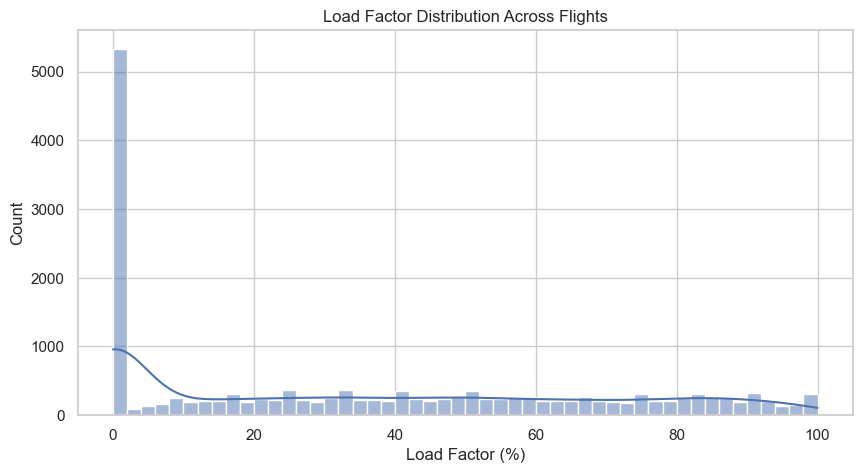

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(flight_load['load_factor'], bins=50, kde=True)
plt.title("Load Factor Distribution Across Flights")
plt.xlabel("Load Factor (%)")
plt.show()


### Identify Loss-Making Flights

In [59]:
#Flights with Load Factor < 60% = Operational Risk

low_load_flights = flight_load[flight_load['load_factor'] < 60]

print("Number of low performing flights:", len(low_load_flights))
low_load_flights[['flight_id','aircraft_code','load_factor']].head()


Number of low performing flights: 12217


,flight_id,aircraft_code,load_factor
0,1,321,46.470588
1,2,321,59.411765
2,3,321,57.058824
3,14,321,0.000000
4,15,321,0.000000


### Worst Aircraft Types

### Which aircraft models are inefficient?

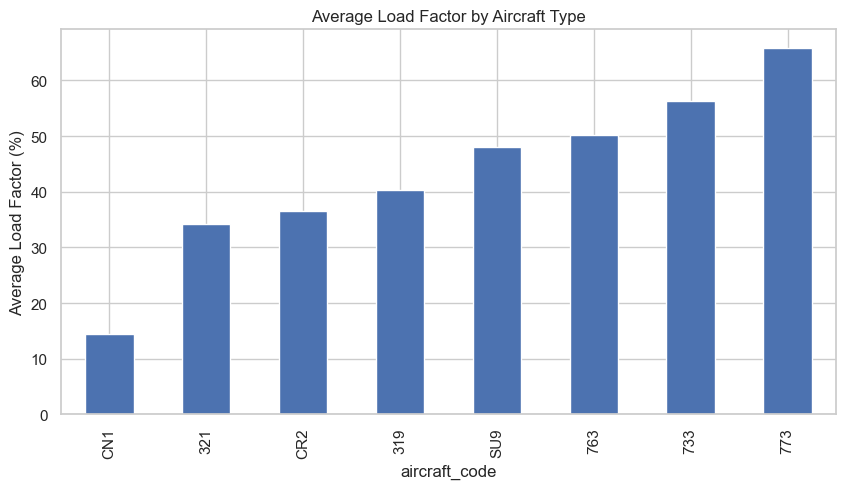

In [60]:
aircraft_performance = flight_load.groupby('aircraft_code')['load_factor'].mean().sort_values()

plt.figure(figsize=(10,5))
aircraft_performance.plot(kind='bar')
plt.title("Average Load Factor by Aircraft Type")
plt.ylabel("Average Load Factor (%)")
plt.show()


### Route Demand Analysis

### Which routes have demand but not enough capacity?

In [61]:
route_demand = flight_load.groupby(
    ['departure_airport','arrival_airport']
)['boarded_passengers'].sum().sort_values(ascending=False).head(10)

route_demand


departure_airport  arrival_airport
SVO                LED                9633.0
DME                OVB                9550.0
SVO                AER                9362.0
                   SVX                9294.0
OVB                DME                8483.0
SVX                SVO                8386.0
VKO                PEE                8277.0
SVO                OVB                7811.0
LED                SVO                7751.0
AER                SVO                7484.0
Name: boarded_passengers, dtype: float64

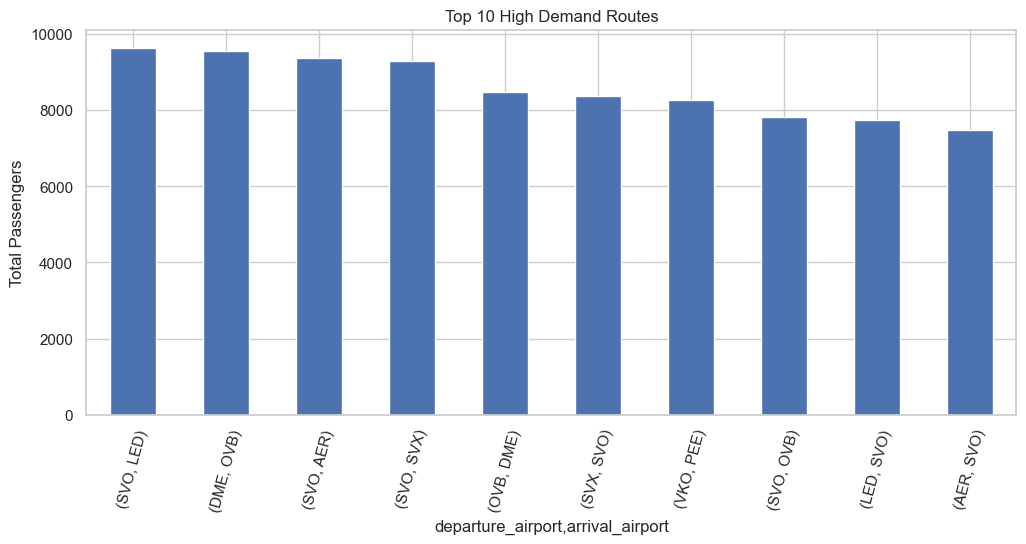

In [62]:
route_demand.plot(kind='bar', figsize=(12,5))
plt.title("Top 10 High Demand Routes")
plt.ylabel("Total Passengers")
plt.xticks(rotation=75)
plt.show()


This bar chart displays the routes with the highest number of passengers across the airline network. The SVO–LED and DME–OVB routes carry the largest passenger volumes, each serving around 9,500+ travelers, while other listed routes still maintain consistently high traffic above roughly 7,500 passengers. The graph shows that passenger demand is concentrated on a limited set of routes, indicating these routes experience significantly heavier travel activity compared to others.

### Total Airline Revenue

In [63]:
total_revenue = pd.read_sql_query("""

SELECT 
    SUM(amount) AS total_airline_revenue
FROM ticket_flights;

""", conn)

total_revenue


,total_airline_revenue
0,20766980900


### Revenue Per Flight

In [64]:
revenue_per_flight = pd.read_sql_query("""

SELECT 
    flight_id,
    SUM(amount) AS flight_revenue
FROM ticket_flights
GROUP BY flight_id;

""", conn)

revenue_per_flight.head()


,flight_id,flight_revenue
0,1,693700
1,2,867700
2,3,853600
3,5,800800
4,6,868300


In [65]:
flight_load = flight_load.merge(revenue_per_flight, on='flight_id', how='left')
flight_load.head()


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,departure_delay,arrival_delay,boarded_passengers,total_seats,load_factor,flight_revenue
0,1,PG0405,2017-07-16 09:35:00+03:00,2017-07-16 10:30:00+03:00,DME,LED,Arrived,321,2017-07-16 09:44:00+03:00,2017-07-16 10:39:00+03:00,9.0,9.0,79.0,170,46.470588,693700.0
1,2,PG0404,2017-08-05 19:05:00+03:00,2017-08-05 20:00:00+03:00,DME,LED,Arrived,321,2017-08-05 19:06:00+03:00,2017-08-05 20:01:00+03:00,1.0,1.0,101.0,170,59.411765,867700.0
2,3,PG0405,2017-08-05 09:35:00+03:00,2017-08-05 10:30:00+03:00,DME,LED,Arrived,321,2017-08-05 09:39:00+03:00,2017-08-05 10:34:00+03:00,4.0,4.0,97.0,170,57.058824,853600.0
3,14,PG0402,2017-08-06 12:25:00+03:00,2017-08-06 13:20:00+03:00,DME,LED,Arrived,321,2017-08-06 12:28:00+03:00,2017-08-06 13:23:00+03:00,3.0,3.0,0.0,170,0.000000,NaN
4,15,PG0402,2017-07-28 12:25:00+03:00,2017-07-28 13:20:00+03:00,DME,LED,Arrived,321,2017-07-28 12:31:00+03:00,2017-07-28 13:26:00+03:00,6.0,6.0,0.0,170,0.000000,NaN


### Revenue vs Load Factor

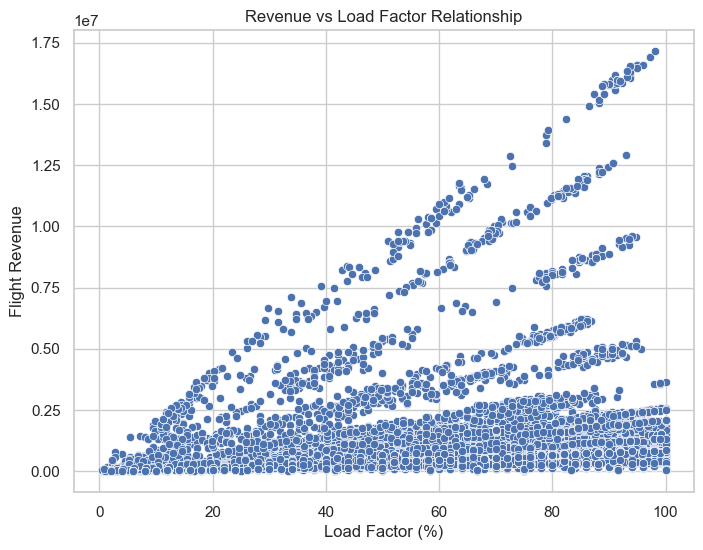

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=flight_load, x='load_factor', y='flight_revenue')
plt.title("Revenue vs Load Factor Relationship")
plt.xlabel("Load Factor (%)")
plt.ylabel("Flight Revenue")
plt.show()


This scatter plot illustrates the relationship between flight seat occupancy (load factor) and the revenue generated per flight. As the load factor increases toward 80–100%, the flight revenue also rises significantly, with the highest revenues observed on flights that are nearly full. The graph clearly shows a positive relationship, indicating that flights with more occupied seats generate substantially higher revenue compared to low-occupancy flights.

### Revenue by Fare Class

In [67]:
fare_revenue = pd.read_sql_query("""

SELECT 
    fare_conditions,
    SUM(amount) AS total_revenue,
    COUNT(ticket_no) AS tickets_sold,
    AVG(amount) AS avg_ticket_price
FROM ticket_flights
GROUP BY fare_conditions;

""", conn)

fare_revenue


,fare_conditions,total_revenue,tickets_sold,avg_ticket_price
0,Business,5505179600,107642,51143.416139
1,Comfort,566116900,17291,32740.552889
2,Economy,14695684400,920793,15959.813335


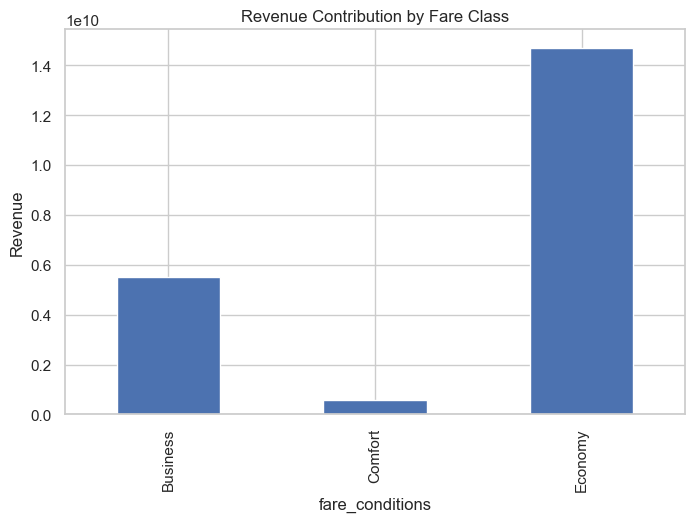

In [68]:
fare_revenue.set_index('fare_conditions')['total_revenue'].plot(kind='bar', figsize=(8,5))
plt.title("Revenue Contribution by Fare Class")
plt.ylabel("Revenue")
plt.show()


This bar chart shows the total revenue generated from each ticket class. The Economy class contributes the largest share of revenue (around 14+ billion), significantly higher than Business class (about 5+ billion), while the Comfort class contributes only a very small portion. The graph indicates that the airline’s overall revenue is primarily driven by high passenger volume in Economy class rather than premium seating categories.

### Highest Earning Routes

In [69]:
route_revenue = pd.read_sql_query("""

SELECT 
    f.departure_airport,
    f.arrival_airport,
    SUM(tf.amount) AS route_revenue
FROM flights f
JOIN ticket_flights tf ON f.flight_id = tf.flight_id
GROUP BY f.departure_airport, f.arrival_airport
ORDER BY route_revenue DESC
LIMIT 10;

""", conn)

route_revenue


,departure_airport,arrival_airport,route_revenue
0,DME,KHV,753478300
1,KHV,DME,733797800
2,DME,OVB,548218900
3,OVB,DME,531503700
4,KHV,LED,507672400
5,LED,KHV,498750700
6,SVO,OVB,458130400
7,OVB,SVO,446051200
8,LED,IKT,411603000
9,IKT,LED,404050300


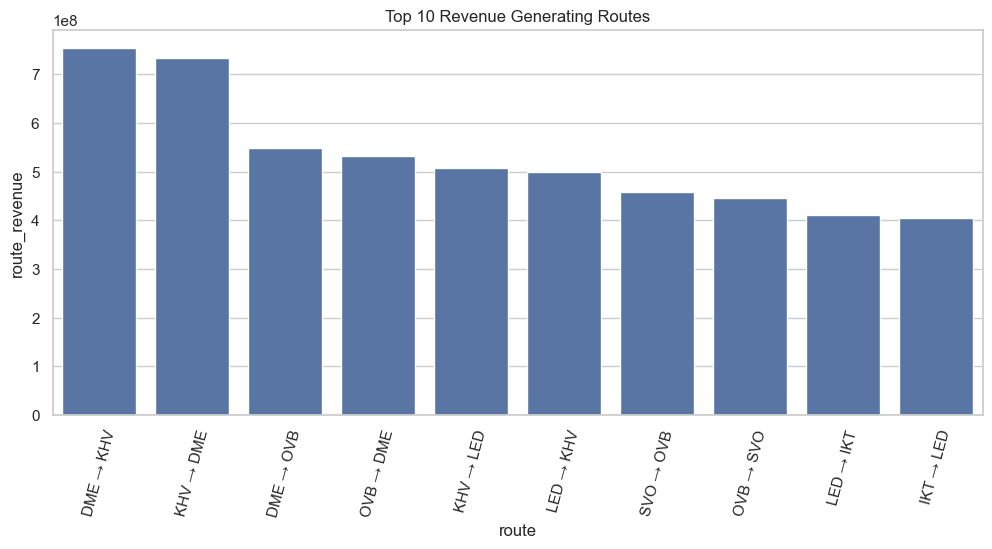

In [70]:
route_revenue['route'] = route_revenue['departure_airport'] + " → " + route_revenue['arrival_airport']

plt.figure(figsize=(12,5))
sns.barplot(data=route_revenue, x='route', y='route_revenue')
plt.xticks(rotation=75)
plt.title("Top 10 Revenue Generating Routes")
plt.show()


This bar chart presents the routes that generate the highest total revenue for the airline. The DME → KHV and KHV → DME routes produce the maximum earnings, each generating roughly 700+ million in revenue, while the remaining routes also contribute substantial amounts above approximately 400 million. The graph shows that a small group of routes accounts for a significant share of the airline’s total revenue.

### Revenue Per Aircraft

In [71]:
aircraft_revenue = pd.read_sql_query("""

SELECT 
    f.aircraft_code,
    SUM(tf.amount) AS total_revenue
FROM flights f
JOIN ticket_flights tf ON f.flight_id = tf.flight_id
GROUP BY f.aircraft_code
ORDER BY total_revenue DESC;

""", conn)

aircraft_revenue


,aircraft_code,total_revenue
0,SU9,5114484700
1,763,4371277100
2,773,3431205500
3,319,2706163100
4,CR2,1982760500
5,321,1638164100
6,733,1426552100
7,CN1,96373800


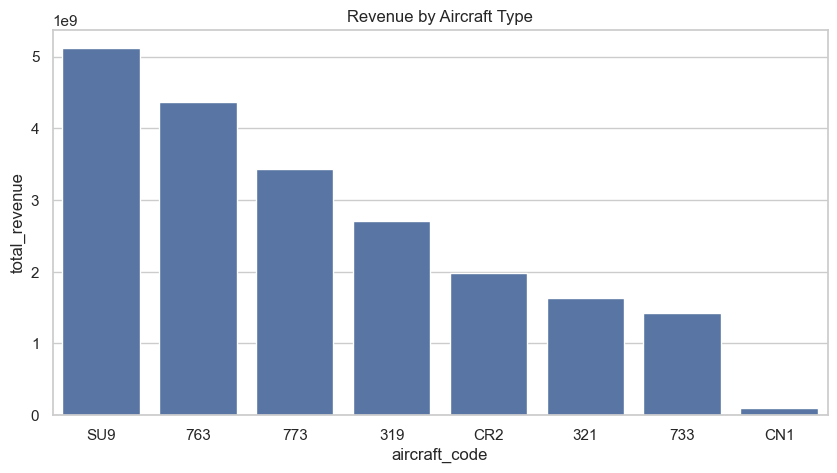

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(data=aircraft_revenue, x='aircraft_code', y='total_revenue')
plt.title("Revenue by Aircraft Type")
plt.show()


This bar chart shows the total revenue generated by each aircraft model. The SU9 aircraft produces the highest revenue at approximately 5+ billion, followed by the 763 and 773 aircraft, while the CN1 aircraft generates very minimal revenue compared to others. The graph indicates that revenue generation is uneven across the fleet, with certain aircraft types contributing significantly more to overall airline earnings than others.